##Transfer Learning 
model使用list而非用add推疊

In [0]:
%tensorflow_version 2.x

In [86]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import datasets
from keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

Using TensorFlow backend.


##Cifar10

In [0]:
name_list = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [0]:
##讀取資料
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

train images length : 50000 
train labels length : 50000 
test images length  : 10000 
test labels length  : 10000
train images max value  : 255 
train value max label : [9] 
shape : (50000, 32, 32, 3)


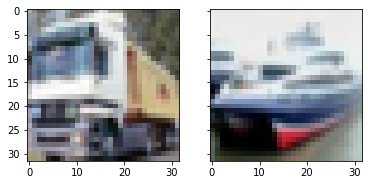

In [97]:
print(
    "train images length :",len(train_images),
    "\ntrain labels length :",len(train_labels),
    "\ntest images length  :",len(test_images),
    "\ntest labels length  :",len(test_labels))

##definite a funciton to see  pictures

def graph_show_and_find_the_max_value(n):
    f,(ax1, ax2) = plt.subplots(1,2, sharey=True)
    ax1.imshow(train_images[n],cmap='Greys')
    ax2.imshow(test_images[n],cmap ='Greys')
    max_value_images=np.amax(train_images)
    max_value_labels=max(train_labels)
    shape = train_images.shape
    print("train images max value  :" , max_value_images,
          "\ntrain value max label :",max_value_labels,
          "\nshape :" , shape)



##check function can work 
graph_show_and_find_the_max_value(1)


##Reshape
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255




train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_51 (Conv2D)           (None, 32, 32, 64)        832       
_________________________________________________________________
dropout_12 (Dropout)         (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
flatten_21 (Flatten)         (None, 16384)             0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 16384)             0         
_________________________________________________________________
dense_73 (Dense)             (None, 256)               4194560   
_________________________________________________________________
dense_74 (Dense)             (None, 10)              

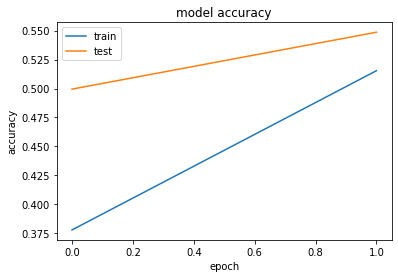

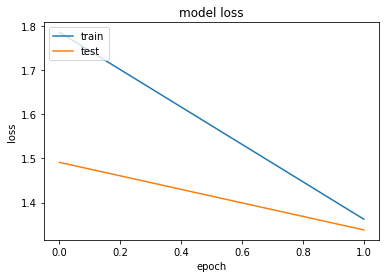

In [101]:
#######       model building

model = Sequential()

model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(32,32,3))) 
model.add(Dropout(0.3))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy']) 
model_result= model.fit(train_images,train_labels,validation_data=(test_images,test_labels),batch_size= 256 ,epochs=2)




####### plot  train and validation loss、accuracy
plt.plot(model_result.history['accuracy'])
plt.plot(model_result.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_result.history['loss'])
plt.plot(model_result.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

##Cifar100

In [0]:
# Load CIFAR 100
(X_train, y_train0), (X_test, y_test0) = datasets.cifar100.load_data()

# Normalize the range of featurs
X_train = X_train / X_train.max()
X_test = X_test / X_test.max()

# One-hot encoding
y_train = to_categorical(y_train0, 100)
y_test = to_categorical(y_test0, 100)

##Layer Transfer

In [104]:
first_layer = [Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(32,32,3)),
               Dropout(0.3),
               MaxPooling2D(pool_size=(2,2)),
               Flatten(),
               Dropout(0.3)]

second_layer =[Dense(units=256, activation='relu'),
              Dense(units=10, activation='softmax')]        

model_1 = Sequential(first_layer+second_layer)  
model_1.summary()   

Model: "sequential_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_52 (Conv2D)           (None, 32, 32, 64)        832       
_________________________________________________________________
dropout_14 (Dropout)         (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
flatten_22 (Flatten)         (None, 16384)             0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 16384)             0         
_________________________________________________________________
dense_75 (Dense)             (None, 256)               4194560   
_________________________________________________________________
dense_76 (Dense)             (None, 10)              

In [108]:
third_layer_100 =[Dense(units=64, activation='relu'),
                  Dense(units=100, activation='sigmoid')]        

model_2 = Sequential(first_layer+third_layer_100)  
model_2.summary()   

Model: "sequential_51"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_52 (Conv2D)           (None, 32, 32, 64)        832       
_________________________________________________________________
dropout_14 (Dropout)         (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
flatten_22 (Flatten)         (None, 16384)             0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 16384)             0         
_________________________________________________________________
dense_79 (Dense)             (None, 64)                1048640   
_________________________________________________________________
dense_80 (Dense)             (None, 100)             

Model: "sequential_51"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_52 (Conv2D)           (None, 32, 32, 64)        832       
_________________________________________________________________
dropout_14 (Dropout)         (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
flatten_22 (Flatten)         (None, 16384)             0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 16384)             0         
_________________________________________________________________
dense_79 (Dense)             (None, 64)                1048640   
_________________________________________________________________
dense_80 (Dense)             (None, 100)             

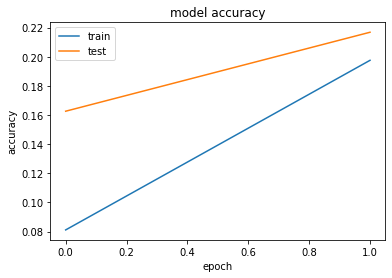

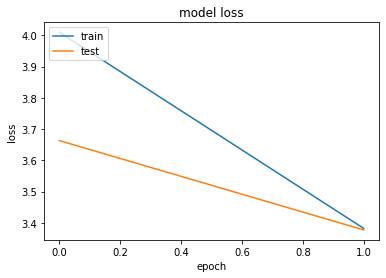

In [109]:
##frozen
##跟別人借的權重不能訓練
##不會影響原來模型的表現
for layer in first_layer:
    layer.trainable = False
model_2.summary()   

model_2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy']) 
model_result= model_2.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size= 256 ,epochs=2)




####### plot  train and validation loss、accuracy
plt.plot(model_result.history['accuracy'])
plt.plot(model_result.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_result.history['loss'])
plt.plot(model_result.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Model: "sequential_51"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_52 (Conv2D)           (None, 32, 32, 64)        832       
_________________________________________________________________
dropout_14 (Dropout)         (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
flatten_22 (Flatten)         (None, 16384)             0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 16384)             0         
_________________________________________________________________
dense_79 (Dense)             (None, 64)                1048640   
_________________________________________________________________
dense_80 (Dense)             (None, 100)             

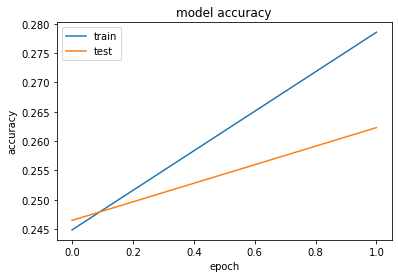

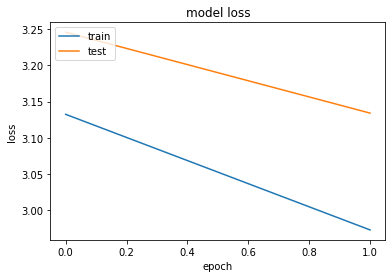

In [111]:
##fine_tune
##跟別人借的權重可以訓練
##連帶影響原來模型的表現
for layer in first_layer:
    layer.trainable = True
model_2.summary()   

model_2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy']) 
model_result= model_2.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size= 256 ,epochs=2)




####### plot  train and validation loss、accuracy
plt.plot(model_result.history['accuracy'])
plt.plot(model_result.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_result.history['loss'])
plt.plot(model_result.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()